In [2]:
import tweepy
import re
import pickle
import pandas as pd
import statistics
import plotly
import plotly.graph_objects as go
import operator
import matplotlib.pyplot as plt

In [3]:
consumer_key = 'cyXcjxUc1ZlLD2v1DjaJrLiVI' 
consumer_secret = 'pD3mk041ROBiSSwt2C3kytR9eF1zYrX1vBD8whpDln5Zq4y1jX' 
access_key = '1279253779540410373-8ODCqefNcIvSFXSrwKH7DPhtQTda3i' 
access_secret = 'nVGU8WyEdGCQ2gU1qQ57NXxLpYQts4Emt1UPM6GVlYaav'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
tweets = tweepy.Cursor(api.search, q="#ipl",tweet_mode='extended').items(5000)
data=[]
for tweet in tweets:
  data.append(tweet)

In [8]:
infile = open("/content/drive/MyDrive/psosm/sec2",'rb')
sec2_data = pickle.load(infile)
infile.close() 

In [ ]:
filename = 'sec2'
outfile = open(filename,'wb')
pickle.dump(sec2_data,outfile)
outfile.close()

In [5]:
def get_top(data):
  h_dict={}
  for tweet in data:
    l=tweet.entities['hashtags']
    for i in range(len(l)):
      if l[i]['text'] in h_dict.keys():
        h_dict[l[i]['text']]=h_dict[l[i]['text']]+1
      else:
        h_dict[l[i]['text']]=1
  s=dict( sorted(h_dict.items(), key=operator.itemgetter(1),reverse=True))
  return s

In [6]:
def get_top_likes(data):
  h_dict={}
  for tweet in data:
    l=tweet.entities['hashtags']
    for i in range(len(l)):
      if l[i]['text'] in h_dict.keys():
        h_dict[l[i]['text']]=h_dict[l[i]['text']]+tweet.favorite_count
      else:
        h_dict[l[i]['text']]=tweet.favorite_count
  s=dict( sorted(h_dict.items(), key=operator.itemgetter(1),reverse=True))
  return s

In [7]:
def get_top_retweets(data):
  h_dict={}
  for tweet in data:
    l=tweet.entities['hashtags']
    for i in range(len(l)):
      if l[i]['text'] in h_dict.keys():
        h_dict[l[i]['text']]=h_dict[l[i]['text']]+tweet.retweet_count
      else:
        h_dict[l[i]['text']]=tweet.retweet_count
  s=dict( sorted(h_dict.items(), key=operator.itemgetter(1),reverse=True))
  return s

In [10]:
def get_ctm(data,ht):
  user_dict={}
  re_tw=0
  total=0
  for tweet in data:
    l=tweet.entities['hashtags']
    for i in range(len(l)):
      if l[i]['text']==ht:
        if tweet.user.screen_name in user_dict.keys():
          user_dict[tweet.user.screen_name]=user_dict[tweet.user.screen_name]+1
        else:
          user_dict[tweet.user.screen_name]=1
        isRT = hasattr(tweet, 'retweeted_status')
        if isRT==True:
          re_tw=re_tw+1
        total=total+1
        break
  s=dict( sorted(user_dict.items(), key=operator.itemgetter(1),reverse=True))
  return [ht,(re_tw/total)*100,(sum(list(s.values())[:50])/total)*100,total/len(s)]

In [ ]:
top_10=list(get_top(data).keys())[1:11]
sec2_data=[]
for ht in top_10:
  tweets = tweepy.Cursor(api.search, q=ht,tweet_mode='extended').items(1000)
  l=[]
  for tweet in tweets:
    l.append(tweet)
  sec2_data.extend(l)

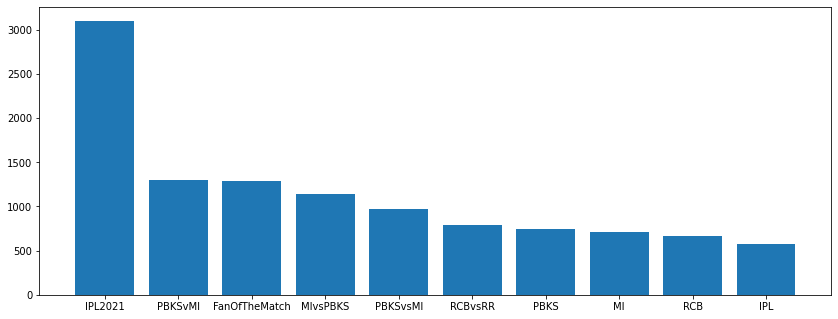

,Hashttag,R,F,U,CTM
0,IPL2021,40.897353,21.755972,2.249818,28.095525
1,PBKSvMI,35.990712,34.365325,2.153333,40.117730
2,FanOfTheMatch,2.321981,42.337461,3.800000,46.369659
3,MIvsPBKS,15.553603,45.342707,2.888325,49.786392
4,PBKSvsMI,32.507740,36.945304,1.697023,41.893101
5,RCBvsRR,92.484076,19.490446,1.256000,29.994854
6,PBKS,37.290503,40.363128,1.956284,46.048463
7,MI,55.947137,39.794420,1.830645,47.219779
8,RCB,85.779817,29.357798,1.406452,39.342231
9,IPL,62.807018,34.210526,1.496063,41.987291


In [11]:
s=get_top(sec2_data)
fig = plt.figure(figsize=(11, 4))
ax = fig.add_axes([0,0,1,1])
top_10=list(s.keys())[0:10]
ax.bar(list(s.keys())[0:10],list(s.values())[0:10] )
plt.show()
df_list=[]
for ht in top_10:
  df_list.append(get_ctm(sec2_data,ht))
df = pd.DataFrame(df_list, columns = ['Hashttag', 'R','F','U'])
df['CTM']=df['R']/10+df['F']+df['U']
df

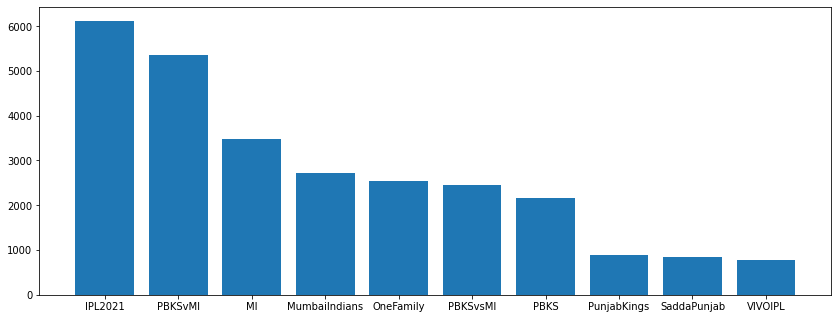

,HashTag,R,F,U,CTM
0,IPL2021,40.897353,21.755972,2.249818,28.095525
1,PBKSvMI,35.990712,34.365325,2.153333,40.117730
2,MI,55.947137,39.794420,1.830645,47.219779
3,MumbaiIndians,63.475177,64.539007,1.880000,72.766525
4,OneFamily,69.257951,70.671378,2.176923,79.774096
5,PBKSvsMI,32.507740,36.945304,1.697023,41.893101
6,PBKS,37.290503,40.363128,1.956284,46.048463
7,PunjabKings,57.819905,87.203791,2.740260,95.726042
8,SaddaPunjab,64.772727,89.772727,3.428571,99.678571
9,VIVOIPL,53.465347,87.128713,1.603175,94.078422


In [12]:
s=get_top_likes(sec2_data)
fig = plt.figure(figsize=(11, 4))
ax = fig.add_axes([0,0,1,1])
top_10=list(s.keys())[0:10]
ax.bar(list(s.keys())[0:10],list(s.values())[0:10] )
plt.show()
df_list=[]
for ht in top_10:
  df_list.append(get_ctm(sec2_data,ht))
df = pd.DataFrame(df_list, columns = ['HashTag', 'R','F','U'])
df['CTM']=df['R']/10+df['F']+df['U']
df

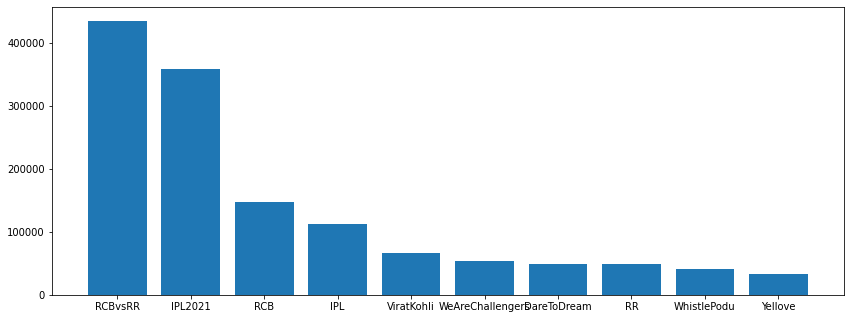

,HashTag,R,F,U,CTM
0,RCBvsRR,92.484076,19.490446,1.256000,29.994854
1,IPL2021,40.897353,21.755972,2.249818,28.095525
2,RCB,85.779817,29.357798,1.406452,39.342231
3,IPL,62.807018,34.210526,1.496063,41.987291
4,ViratKohli,91.205212,37.785016,1.273859,48.179396
5,WeAreChallengers,96.808511,71.276596,1.220779,82.178226
6,DareToDream,100.000000,89.189189,1.275862,100.465051
7,RR,84.012539,48.275862,1.483721,58.160837
8,WhistlePodu,92.727273,100.000000,2.115385,111.388112
9,Yellove,100.000000,100.000000,2.500000,112.500000


In [13]:
s=get_top_retweets(sec2_data)
fig = plt.figure(figsize=(11, 4))
ax = fig.add_axes([0,0,1,1])
top_10=list(s.keys())[0:10]
ax.bar(list(s.keys())[0:10],list(s.values())[0:10] )
plt.show()
df_list=[]
for ht in top_10:
  df_list.append(get_ctm(sec2_data,ht))
df = pd.DataFrame(df_list, columns = ['HashTag', 'R','F','U'])
df['CTM']=df['R']/10+df['F']+df['U']
df